# Ejercicio donde se realiza un preprocesado de un conjunto de imagenes descargadas de Kaggle para pasarlo por un pre-procesamiento y asi formar un dataset que pueda ser utilizado por una red de arquitectura (TinnyVGG) utilizando PyTorch

El dataset fue recuperado del siguiente link de:                                                            
<a href="https://www.kaggle.com/datasets/olavomendes/cars-vs-flowers?resource=download" target="_parent"><img src="https://www.vectorlogo.zone/logos/kaggle/kaggle-ar21.svg" alt="Abrir Kaggle"/></a>

## 1.- Cargamos los path del conjunto de datos

In [97]:
from pathlib import Path

ruta = Path("data/")
ruta_data = ruta/"cars_vs_flowers"
if ruta_data.is_dir():
    print(f"{ruta_data} El directorio existe.")
else:
    print(f"No se encontro el folder {ruta_data}")

data\cars_vs_flowers El directorio existe.


## 2.- Verificamos los archivos dentro de los directorios

In [98]:
import os
def recorrer_datos(dir_ruta):
    for rutadir, nombredir, nombres in os.walk(ruta_data):
        print(f"Hay {len(nombredir)} directorios y {len(nombres)} imagenes in '{rutadir}")
recorrer_datos(ruta_data)

Hay 2 directorios y 2 imagenes in 'data\cars_vs_flowers
Hay 2 directorios y 0 imagenes in 'data\cars_vs_flowers\test_set
Hay 0 directorios y 1000 imagenes in 'data\cars_vs_flowers\test_set\car
Hay 0 directorios y 1000 imagenes in 'data\cars_vs_flowers\test_set\flower
Hay 2 directorios y 0 imagenes in 'data\cars_vs_flowers\training_set
Hay 0 directorios y 1000 imagenes in 'data\cars_vs_flowers\training_set\car
Hay 0 directorios y 1000 imagenes in 'data\cars_vs_flowers\training_set\flower


## 3.- Definimos las rutas de entranmiento y prueba

In [99]:
train_rut = ruta_data / "training_set"
test_rut = ruta_data / "test_set"

train_rut, test_rut

(WindowsPath('data/cars_vs_flowers/training_set'),
 WindowsPath('data/cars_vs_flowers/test_set'))

## 4.- Visualizamos las imagenes dentro de los folders

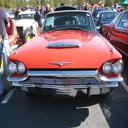

In [100]:
from PIL import Image
import random
random.seed (1)
lista_rutas = list(ruta_data.glob("*/*/*.jpg"))
ruta_alea = random.choice(lista_rutas)
img = Image.open(ruta_alea)
img



### Debido a que la imagen esta en PIL debermos de pasarla a tensores

In [101]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
transformacion_imgs = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.ToTensor()
])

### 5.- Realizamos una comparacion entre una imagen del dataset normal y una transformada

tensor([[[0.1412, 0.3529, 0.2196],
         [0.1412, 0.3529, 0.2196],
         [0.1412, 0.3529, 0.2196],
         ...,
         [0.2431, 0.4196, 0.3373],
         [0.2431, 0.4196, 0.3373],
         [0.2431, 0.4196, 0.3373]],

        [[0.1412, 0.3529, 0.2196],
         [0.1412, 0.3529, 0.2196],
         [0.1412, 0.3529, 0.2196],
         ...,
         [0.2392, 0.4196, 0.3373],
         [0.2392, 0.4196, 0.3373],
         [0.2392, 0.4196, 0.3373]],

        [[0.1412, 0.3529, 0.2196],
         [0.1412, 0.3529, 0.2196],
         [0.1412, 0.3529, 0.2196],
         ...,
         [0.2314, 0.4157, 0.3333],
         [0.2314, 0.4157, 0.3333],
         [0.2314, 0.4157, 0.3333]],

        ...,

        [[0.3490, 0.3647, 0.2000],
         [0.3451, 0.3569, 0.1882],
         [0.3451, 0.3569, 0.1804],
         ...,
         [0.2039, 0.3922, 0.4627],
         [0.2039, 0.3922, 0.4588],
         [0.1686, 0.3569, 0.4196]],

        [[0.2471, 0.3647, 0.1686],
         [0.2510, 0.3608, 0.1569],
         [0.

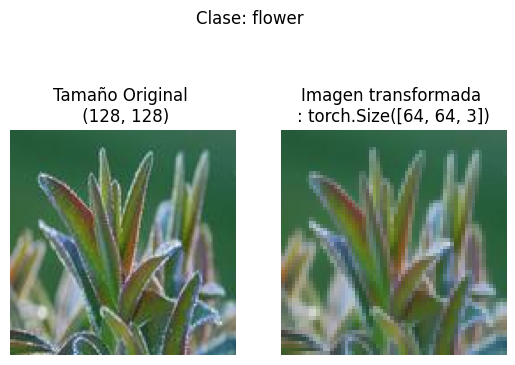

In [102]:
import matplotlib.pyplot as plt
def mostrar_imagenes(ruta,transform,n:int,seed:int):
    random.seed(seed)
    imagenes_random = random.sample(ruta, k=n)
    for ruta_img in imagenes_random:
        with Image.open(ruta_img) as f:
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"Tamaño Original \n {f.size}")
            ax[0].axis("off")
            imagen_trans = transform(f).permute(1,2,0)
            print(imagen_trans)
            ax[1].imshow(imagen_trans)
            ax[1].set_title(f"Imagen transformada \n: {imagen_trans.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Clase: {ruta_img.parent.stem}")
mostrar_imagenes(lista_rutas,transformacion_imgs, n=1, seed=251)


### 6.- Debido a que estamos trabajando con un dataset que no esta incluido en las librerias de PyTorch trabajaremos con ImageFolder que nos permite crear datasets con carpetas externas

In [103]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_rut,
                                  transform=transformacion_imgs,
                                  target_transform=None
                                  )
test_data = datasets.ImageFolder(root=test_rut,
                                 transform=transformacion_imgs)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 2000
     Root location: data\cars_vs_flowers\training_set
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.2)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 2000
     Root location: data\cars_vs_flowers\test_set
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.2)
                ToTensor()
            ))

###  ¡Ya tendriamos el dataset listo para verificar enlistaremos las clases!

In [104]:
clases_nombre = train_data.classes
clases_nombre

['car', 'flower']

### Inspeccionaremos como es que se ven las imagenes

In [105]:
imagen, target = train_data[0][0], train_data[0][1]
print(imagen)
print(f"La imagen tiene una forma {imagen.shape}")
print(f"La imagen es de tipo {imagen.dtype}")
print(f"El label/target de la imagen es {target}")

tensor([[[0.4392, 0.6039, 0.5020,  ..., 0.4275, 0.3451, 0.3804],
         [0.3843, 0.4824, 0.5333,  ..., 0.4627, 0.3686, 0.5216],
         [0.4196, 0.5294, 0.5412,  ..., 0.6667, 0.4431, 0.4275],
         ...,
         [0.3843, 0.3255, 0.2824,  ..., 0.5412, 0.4392, 0.4510],
         [0.5294, 0.3333, 0.4235,  ..., 0.4824, 0.3725, 0.2824],
         [0.5882, 0.4078, 0.4588,  ..., 0.3451, 0.2980, 0.2314]],

        [[0.5020, 0.6667, 0.5647,  ..., 0.4941, 0.4118, 0.4627],
         [0.4431, 0.5451, 0.5922,  ..., 0.5255, 0.4353, 0.6039],
         [0.4745, 0.5843, 0.5922,  ..., 0.7294, 0.5059, 0.5059],
         ...,
         [0.4431, 0.3804, 0.3333,  ..., 0.5882, 0.4902, 0.4980],
         [0.5882, 0.3843, 0.4627,  ..., 0.5451, 0.4314, 0.3412],
         [0.6471, 0.4588, 0.4980,  ..., 0.4118, 0.3608, 0.2941]],

        [[0.3882, 0.5608, 0.4745,  ..., 0.3294, 0.2471, 0.1882],
         [0.3412, 0.4431, 0.4980,  ..., 0.3451, 0.2627, 0.3412],
         [0.4000, 0.5059, 0.5137,  ..., 0.5255, 0.3137, 0.

In [106]:
imagen = imagen.permute(1,2,0)
imagen.shape

torch.Size([64, 64, 3])

### 7.- Creamos los dataloader

In [107]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=0,
                              shuffle=True
                              )
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=0,
                             shuffle=False
                             )
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x27b34958710>,
 <torch.utils.data.dataloader.DataLoader at 0x27b3765a7e0>)

### Verificamos una imagen del train dataloader para ver su forma

In [108]:
img, label = next(iter(train_dataloader))
img.shape
#[batchsize, canalescolor, altura, anchura]

torch.Size([1, 3, 64, 64])

### 8.- Creamos un modelo
Debido a que es un problema de clasificacion se baso en la red TinyVGG que se presenta en este sitio web. [TinyVGG](https://poloclub.github.io/cnn-explainer/)

In [109]:
from torch import nn
class Red(nn.Module):
    def __init__(self, entrada:int, unidades_ocultas: int, salida:int)-> None:
        super().__init__()
        self.bloque_1 = nn.Sequential(
            nn.Conv2d(in_channels=entrada,
                      out_channels=unidades_ocultas,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=unidades_ocultas,
                      out_channels=unidades_ocultas,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.bloque_2 = nn.Sequential(
            nn.Conv2d(in_channels=unidades_ocultas,
                      out_channels=unidades_ocultas,
                       kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=unidades_ocultas,
                      out_channels=unidades_ocultas,
                       kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=unidades_ocultas*16*16,
                      out_features=salida)
        )
    def forward(self,x: torch.Tensor):
        x = self.bloque_1(x)
        x = self.bloque_2(x)
        x = self.classifier(x)
        return x
modelo = Red(entrada=3,unidades_ocultas=10, salida=len(train_data.classes))
modelo

Red(
  (bloque_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (bloque_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=2, bias=True)
  )
)

### `Buena Practica `
`Pasar una imagen para ver como esta respondiendo la red a una imagen sola`

In [110]:
imagen_batch, label_batch = next(iter(train_dataloader))
imagen_simple, label_simple = imagen_batch[0].unsqueeze(dim=0),label_batch[0]
imagen_simple.shape
modelo.eval()
with torch.inference_mode():
    pred =modelo(imagen_simple)
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_simple}")

Output logits:
tensor([[0.0436, 0.0323]])

Output prediction probabilities:
tensor([[0.5028, 0.4972]])

Output prediction label:
tensor([0])

Actual label:
0


`Evaluamos la imagen transformada para pasarla por el modelo`

In [111]:
modelo.eval()
with torch.inference_mode():
    pred = modelo(imagen_simple)
print(f"Los logits por clase son {pred}")
print(f"Las predicciones por clase son {torch.argmax(torch.softmax(pred, dim=1))}\n")
print(f"El label de la clase es {label_simple}")

Los logits por clase son tensor([[0.0436, 0.0323]])
Las predicciones por clase son 0

El label de la clase es 0


### 9.- Crearemos las funciones de entrenamiento y prueba

In [112]:
def entrenamiento(model:torch.nn.Module,
                  dataloader:torch.utils.data.DataLoader,
                  loss_fn:torch.nn.Module,
                  optimizer:torch.optim.Optimizer):
    modelo.train() #ponemos el modelo en modo de entrenamiento
    train_loss, train_acc = 0,0 #Inicializamos los valores de la perdida y del accuracy
    for batch, (X, y) in enumerate(dataloader):
        y_pred = model(X) #El modelo entrena con el dataset ignorando  etiquet
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1),dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc
    

In [117]:
def prueba(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module):
    model.eval() #Ponemos el modelo en modo de evaluación
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            test_logits = model(X)
            loss = loss_fn(test_logits, y)
            test_loss += loss.item()
            test_label = test_logits.argmax(dim=1)
            test_acc += ((test_label == y).sum().item()/len(test_label))
    #Calculamos la perdida y el accuracy total
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc /len(dataloader)
    return test_loss, test_acc

### 10.-  Juntamos ambas funciones en una funcion que junte ambas y retorne los valores de accuracy, loss

In [118]:
from tqdm.auto import tqdm
def train(modelo:torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    resultados = {
        "train_loss": [],
        "train_acc":[],
        "test_loss":[],
        "test_acc":[]
    }
    for epoch in tqdm(range(epochs)):
        train_loss,train_acc = entrenamiento(model=modelo,
                                             dataloader=train_dataloader,
                                             loss_fn=loss_fn,
                                             optimizer=optimizer)
        test_loss,test_acc = prueba(model=modelo,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        resultados["train_loss"].append(train_loss)
        resultados["train_acc"].append(train_acc)
        resultados["test_loss"].append(test_loss)
        resultados["test_acc"].append(test_acc)
    return resultados
    

### 11.- Entrenamos el modelo

In [119]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
modelo = Red(entrada=3,unidades_ocultas=10, salida=len(train_data.classes))
optimizer = torch.optim.Adam(params=modelo.parameters(), lr=0.001)
modelo_res = train(modelo=modelo,
                   train_dataloader=train_dataloader,
                   test_dataloader=test_dataloader,
                   optimizer=optimizer,
                   loss_fn=loss_fn,
                   epochs=20)


  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [01:17<24:26, 77.17s/it]

Epoch: 1 | train_loss: 0.6645 | train_acc: 0.5690 | test_loss: 0.7055 | test_acc: 0.6285


 10%|█         | 2/20 [02:27<21:54, 73.04s/it]

Epoch: 2 | train_loss: 0.5496 | train_acc: 0.7250 | test_loss: 0.5397 | test_acc: 0.7320


 15%|█▌        | 3/20 [03:21<18:15, 64.43s/it]

Epoch: 3 | train_loss: 0.5254 | train_acc: 0.7420 | test_loss: 0.5069 | test_acc: 0.7715


 20%|██        | 4/20 [04:20<16:37, 62.36s/it]

Epoch: 4 | train_loss: 0.4927 | train_acc: 0.7685 | test_loss: 0.4886 | test_acc: 0.7755


 25%|██▌       | 5/20 [05:24<15:43, 62.92s/it]

Epoch: 5 | train_loss: 0.4597 | train_acc: 0.7865 | test_loss: 0.4604 | test_acc: 0.7900


 30%|███       | 6/20 [06:13<13:34, 58.19s/it]

Epoch: 6 | train_loss: 0.4345 | train_acc: 0.8045 | test_loss: 0.4462 | test_acc: 0.8005


 35%|███▌      | 7/20 [06:58<11:40, 53.90s/it]

Epoch: 7 | train_loss: 0.4144 | train_acc: 0.8120 | test_loss: 0.4385 | test_acc: 0.8015


 40%|████      | 8/20 [07:42<10:09, 50.77s/it]

Epoch: 8 | train_loss: 0.4068 | train_acc: 0.8130 | test_loss: 0.4382 | test_acc: 0.7960


 45%|████▌     | 9/20 [08:27<08:56, 48.74s/it]

Epoch: 9 | train_loss: 0.3946 | train_acc: 0.8255 | test_loss: 0.4388 | test_acc: 0.7980


 50%|█████     | 10/20 [09:13<08:01, 48.17s/it]

Epoch: 10 | train_loss: 0.3799 | train_acc: 0.8325 | test_loss: 0.4282 | test_acc: 0.8060


 55%|█████▌    | 11/20 [09:58<07:04, 47.14s/it]

Epoch: 11 | train_loss: 0.3801 | train_acc: 0.8315 | test_loss: 0.4248 | test_acc: 0.8070


 60%|██████    | 12/20 [10:44<06:12, 46.60s/it]

Epoch: 12 | train_loss: 0.3622 | train_acc: 0.8440 | test_loss: 0.4263 | test_acc: 0.8090


 65%|██████▌   | 13/20 [11:27<05:20, 45.77s/it]

Epoch: 13 | train_loss: 0.3564 | train_acc: 0.8470 | test_loss: 0.5010 | test_acc: 0.8055


 70%|███████   | 14/20 [12:12<04:33, 45.52s/it]

Epoch: 14 | train_loss: 0.3349 | train_acc: 0.8510 | test_loss: 0.4781 | test_acc: 0.8035


 75%|███████▌  | 15/20 [12:57<03:46, 45.28s/it]

Epoch: 15 | train_loss: 0.3392 | train_acc: 0.8540 | test_loss: 0.4462 | test_acc: 0.8020


 80%|████████  | 16/20 [13:41<02:58, 44.72s/it]

Epoch: 16 | train_loss: 0.3353 | train_acc: 0.8565 | test_loss: 0.4992 | test_acc: 0.7800


 85%|████████▌ | 17/20 [14:25<02:14, 44.80s/it]

Epoch: 17 | train_loss: 0.3101 | train_acc: 0.8650 | test_loss: 0.5113 | test_acc: 0.7875


 90%|█████████ | 18/20 [15:11<01:29, 44.93s/it]

Epoch: 18 | train_loss: 0.2978 | train_acc: 0.8720 | test_loss: 0.4671 | test_acc: 0.7960


 95%|█████████▌| 19/20 [15:55<00:44, 44.67s/it]

Epoch: 19 | train_loss: 0.2800 | train_acc: 0.8725 | test_loss: 0.5552 | test_acc: 0.7745


100%|██████████| 20/20 [16:40<00:00, 50.04s/it]

Epoch: 20 | train_loss: 0.2676 | train_acc: 0.8840 | test_loss: 0.5310 | test_acc: 0.8015


### 12.- Probamos con una imagen de "validacion" ( imagen no vista por el modelo ni en el conjunto de entrenamiento ni en el de prueba esta puede ser descargada de internet o a veces la incluyen en el dataset a parte como es el caso de esta)

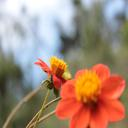

In [120]:
import torchvision
imagenc_ruta = (ruta_data/"flower_test_image.jpg")
imagenc_p = Image.open(imagenc_ruta)
imagenc_p


In [121]:
imagen_prueba = torchvision.io.read_image(str(imagenc_ruta)).type(torch.float32)
print(f"La imagen transformada es {imagen_prueba}")
print(f"La forma de la imagen es {imagen_prueba.shape}")

La imagen transformada es tensor([[[207., 209., 212.,  ..., 133., 131., 133.],
         [211., 213., 216.,  ..., 139., 136., 137.],
         [216., 218., 221.,  ..., 144., 138., 139.],
         ...,
         [ 74.,  74.,  82.,  ..., 138., 136., 135.],
         [ 74.,  75.,  97.,  ..., 132., 130., 129.],
         [ 74.,  76., 107.,  ..., 128., 127., 125.]],

        [[208., 210., 213.,  ..., 148., 141., 144.],
         [212., 214., 217.,  ..., 153., 148., 149.],
         [217., 219., 222.,  ..., 158., 152., 154.],
         ...,
         [ 76.,  74.,  81.,  ..., 115., 109., 105.],
         [ 76.,  75.,  93.,  ..., 120., 115., 111.],
         [ 76.,  76., 103.,  ..., 124., 118., 113.]],

        [[229., 231., 233.,  ..., 171., 166., 166.],
         [233., 234., 237.,  ..., 179., 172., 171.],
         [237., 237., 240.,  ..., 185., 178., 177.],
         ...,
         [ 52.,  48.,  53.,  ...,  84.,  80.,  77.],
         [ 52.,  49.,  66.,  ...,  80.,  76.,  73.],
         [ 52.,  50.,  76.,

In [126]:
imagen_prueba = imagen_prueba/255
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])
imagen_prueba = custom_image_transform(imagen_prueba)
im1_uns = imagen_prueba.unsqueeze(dim=0)
print(f"La imagen transformada es {imagen_prueba}")
print(f"La forma de la imagen es {imagen_prueba.shape}")
im1_uns.shape

La imagen transformada es tensor([[[5.0038e-08, 5.1237e-08, 5.3530e-08,  ..., 3.9344e-08,
          3.4128e-08, 3.1972e-08],
         [5.1879e-08, 5.3125e-08, 5.5231e-08,  ..., 4.0974e-08,
          3.5672e-08, 3.2794e-08],
         [5.2977e-08, 5.4289e-08, 5.6022e-08,  ..., 4.0062e-08,
          3.5332e-08, 3.3246e-08],
         ...,
         [1.7936e-08, 1.8447e-08, 2.7874e-08,  ..., 3.2227e-08,
          3.0938e-08, 3.0057e-08],
         [1.7865e-08, 2.2553e-08, 3.4870e-08,  ..., 3.2028e-08,
          3.2202e-08, 3.2000e-08],
         [1.8481e-08, 2.8262e-08, 3.5594e-08,  ..., 3.0986e-08,
          3.0957e-08, 3.0553e-08]],

        [[5.0274e-08, 5.1490e-08, 5.3864e-08,  ..., 4.3888e-08,
          3.7689e-08, 3.4834e-08],
         [5.2225e-08, 5.3502e-08, 5.5660e-08,  ..., 4.5867e-08,
          3.9448e-08, 3.6341e-08],
         [5.3796e-08, 5.5098e-08, 5.6720e-08,  ..., 4.5368e-08,
          3.9781e-08, 3.7486e-08],
         ...,
         [1.8663e-08, 1.7893e-08, 2.5598e-08,  ..., 2

torch.Size([1, 3, 64, 64])

In [127]:

modelo.eval()
with torch.inference_mode():
    custom_image_pred = modelo(im1_uns)
custom_image_pred

tensor([[0.0067, 0.0667]])

### Debido a que nos da los logits debemos de pasarlo a probabilidades y luego a predicciones

In [129]:
#Para pasar a prediccion debemos de pasar los logits por una capa softmax
preds = torch.softmax(custom_image_pred, dim=1)
#Para pasar la prediccions a label debemos pasarla por una capa argmax
label = torch.argmax(preds,dim=1)
#Ahora eso sera un entero y lo buscaremos en el diccionario de las clases
clase_predicha = clases_nombre[label]
clase_predicha

'flower'

# `Posteriormente podriamos guardar el modelo y cargarlo a una pagina web ,etc.`